<a href="https://colab.research.google.com/github/JunSeokCheon/kaggle_H-M_data_analysis/blob/master/category_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑몰의 기본 상품을 위해서 데이터를 준비하고 가공하는 작업을 진행합니다.

In [ ]:
cd /content/drive/MyDrive/2nd_project_elice/refine_data

/content/drive/MyDrive/2nd_project_elice/refine_data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
articles = pd.read_csv("articles.csv", index_col = 0)                                  
customers = pd.read_csv("customers.csv", index_col = 0)
transactions = pd.read_csv("transactions.csv", index_col = 0)

In [ ]:
pd.options.display.max_columns = None
articles.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
4,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96338 entries, 0 to 96337
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   article_id                    96338 non-null  int64 
 1   product_code                  96338 non-null  int64 
 2   prod_name                     96338 non-null  object
 3   product_type_no               96338 non-null  int64 
 4   product_type_name             96338 non-null  object
 5   product_group_name            96338 non-null  object
 6   graphical_appearance_no       96338 non-null  int64 
 7   graphical_appearance_name     96338 non-null  object
 8   colour_group_code             96338 non-null  int64 
 9   colour_group_name             96338 non-null  object
 10  perceived_colour_value_id     96338 non-null  int64 
 11  perceived_colour_value_name   96338 non-null  object
 12  perceived_colour_master_id    96338 non-null  int64 
 13  perceived_colour

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101776 entries, 0 to 2101775
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 96.2+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371980 entries, 00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657 to ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   FN                      476930 non-null   float64
 1   Active                  464404 non-null   float64
 2   club_member_status      1365918 non-null  object 
 3   fashion_news_frequency  1355971 non-null  object 
 4   age                     1356119 non-null  float64
 5   postal_code             1371980 non-null  object 
dtypes: float64(3), object(3)
memory usage: 73.3+ MB


- 데이터가 비교적 많은 카테고리를 파악하기 위해서 articles에서 "product_group_name", "product_type_name"를 확인합니다.

In [ ]:
pd.options.display.max_rows = None
articles.groupby(["product_group_name", "product_type_name"]).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1273
                       Beanie                         56
                       Belt                          449
                       Bracelet                      172
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    572
                       Dog Wear                       20
                       Earring                      1154
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [ ]:
from PIL import Image
import cv2

- article_id에 해당하는 이미지를 출력해주는 이미지 테스트 함수를 만들었습니다.

In [ ]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

- transactions 파일이 데이터(2천만개)가 있어서 처리하는데 곤란하여 2020-04 ~ 2020-06 데이터만 사용하기로 결정합니다.
- 2020-04 ~ 2020-06 데이터만 사용하는 작업이나, 미리 전처리를 해줬기 때문에 지금은 필요없습니다.
- 중복데이터를 삭제합니다

In [ ]:
# 2020 - 04 - 01 ~ 2020 - 06 - 01 / 중복된 article_id  제거
# transactions["t_dat"] = pd.to_datetime(transactions['t_dat'])
# transactions = transactions.loc[transactions.t_dat >= pd.to_datetime('2020-04-01')] #
# transactions = transactions.loc[transactions.t_dat <= pd.to_datetime('2020-06-01')] #
# transactions = transactions.astype({"article_id" : "str"})
transactions = transactions.drop_duplicates(['article_id'], ignore_index = True)
transactions.shape

(29928, 5)

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2
2,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2
3,2020-04-01,000eae69313b4fc1824fa7e439f168cc140bf4c3f3a7e9...,762096002,0.022576,2
4,2020-04-01,000ec422ba5459f0295c1e86872d61b746bb8f84345efd...,759479001,0.006085,2


In [ ]:
articles = pd.read_csv("articles.csv")

In [ ]:
articles.head()

,Unnamed: 0,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,3,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
4,4,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


- 이미지가 없는 데이터를 수동적으로 삭제해주는 작업이나, 미리 전처리를 해줬기 때문에 지금은 필요없습니다.

In [ ]:
# t-shirt 이미지가 없는 데이터 제거(현재는 1개 밖에 없어서 수동 처리) / 자동화 방법 -> try ~ catch 를 사용해서 이미지를 열었을때 에러가 난다면(없을 경우) 아래와 같이 drop 해주는 방식?
# articles['article_id'] = articles['article_id'].astype(str)
# index1 = articles[articles['article_id'] == "806139001"].index
# articles = articles.drop(index1)
# articles['article_id'] = articles['article_id'].astype(int)

In [ ]:
articles = articles[(articles["index_group_name"] == "Ladieswear") | (articles["index_group_name"] == "Menswear")]

- articles.csv/transactions.csv에서 필요한 컬럼들을 merge/split 진행하여 각 제품의 article_id, 제품 이름, 제품 유형, 제품 색깔, 제품의 상세 설명, 가격데이터를 json 형태로 저장하고, 그에 맞는 이미지도 함께 저장하여 백/프론트로 넘겨줍니다.
- price를 원(₩)화로 변경합니다.

In [ ]:
def want_product_with_price(article, product):
  article = article[article["product_type_name"] == product]
  article = article.loc[:, ["article_id", "prod_name", "product_type_name", "colour_group_name", "detail_desc", "index_group_name"]].reset_index(drop = True)
  article = pd.merge(article, transactions, how='inner', on="article_id")
  article = article.drop(columns=["t_dat", "customer_id",  "sales_channel_id"])
  article = article.sort_values(by="price", ascending=False).reset_index(drop = True)[:100]
  article['price'] = article['price'].map(lambda x : int(round(x*1000*1200, -2)))
  article['article_id'] = article['article_id'].map(lambda x : ("0" + str(x)))
  return article

In [ ]:
a = want_product_with_price(articles, "Sneakers")
a

,article_id,prod_name,product_type_name,colour_group_name,detail_desc,index_group_name,price
0,0782054001,Ingrid PQ sneaker,Sneakers,Black,Warm-lined hi-tops in suede with leather detai...,Ladieswear,162700
1,0759107001,SL Court sneakers,Sneakers,Black,"Leather trainers with chunky raised soles, lac...",Menswear,146400
2,0538358023,Henry court PQ,Sneakers,Grey,"Trainers with lacing at the front, leather lin...",Menswear,122000
3,0712058001,Ryan Chunky Court PQ,Sneakers,White,Chunky-sole trainers with a padded top edge an...,Menswear,122000
4,0915851001,Ryan Court Chunky,Sneakers,White,Chunky-soled trainers with a padded top edge a...,Menswear,122000
5,0712058002,Ryan Chunky Court PQ,Sneakers,Black,Chunky-sole trainers with a padded top edge an...,Menswear,122000
6,0522678003,Art leather sneaker PQ,Sneakers,White,"Trainers with lacing at the front, leather lin...",Menswear,101000
7,0871909001,Lux Sneaker,Sneakers,White,Trainers in leather with suede and mesh detail...,Menswear,97600
8,0538358016,Henry court PQ,Sneakers,White,"Trainers with lacing at the front, leather lin...",Menswear,97600
9,0677993004,Patric court sneaker PQ,Sneakers,White,"Trainers with reinforced toes, a padded edge a...",Menswear,92900


- 회의를 거쳐 여러 가지 상품중에서 일반적이고 데이터가 많은 셔츠(T-shirt) / 니트(Sweater) / 청바지(Trousers) / 치마(Skirt) / 신발(Sneakers) 종류 선정합니다.(확장 가능)

- 카테고리 선정에는 3가지 이유가 있습니다.
1. 필터링으로 인하여 데이터의 양이 많아야 한다.
2. 제품 카테고리가 범용성이 있는 제품이어야 한다.
3. 상의나 하의 같은 한 유형으로 몰리지 말고 골고루 분포되어야 한다.

- 위 3가지 조건으로 인하여 셔츠(T-shirt) / 니트(Sweater) / 청바지(Trousers) / 치마(Skirt) / 신발(Sneakers)가 선정했습니다.

In [ ]:
# 셔츠(T-shirt) / 니트(Sweater) / 청바지(Trousers) / 치마(Skirt) / 신발(Sneakers)
for item in ["T-shirt", "Sweater", "Trousers", "Skirt", "Sneakers"]:
  a = want_product_with_price(articles, item)
  a.to_json(f"../image&json_data/{item}/json/{item}.json", orient = 'records')
  for article_id in a['article_id'].tolist():
    try:
      image = Image.open(f"../images/{article_id[:3]}/{article_id}.jpg")
      image.save(f'../image&json_data/{item}/image/{article_id}.jpg')
    except:
      pass

In [ ]:
ls

'age_id&attribute&article_id.csv'       man_woman_recommedation.csv
'age_id&attribute&fullarticle_id.csv'   total_count_prod.csv
 articles.csv                           transactions.csv
 customers.csv


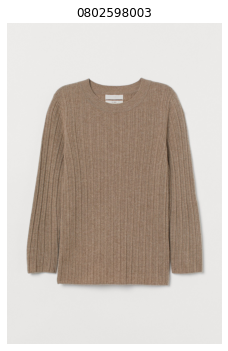

In [ ]:
# show_images(802598003)